In [1]:
# ! python -m pip install nf1

In [2]:
from nf1 import NF1

In [3]:
import os 
import glob
import sklearn.cluster

circles_files = glob.glob("twitter/*.circles")
edges_files = glob.glob("twitter/*.edges")
egofeat_files = glob.glob("twitter/*.egofeat")
feat_files = glob.glob("twitter/*.feat")
featnames_files = glob.glob("twitter/*.featnames")

In [4]:
import numpy as np

In [5]:
from networkx.algorithms import community


In [6]:
from networkx.algorithms.community import greedy_modularity_communities

In [7]:
%matplotlib inline
import networkx as nx


In [8]:
def read_nodeadjlist(filename):
    G = nx.Graph()
    for line in open(filename):
        lst = line.split(' ')
        el, es = lst[0], lst[1][:-1]
        G.add_edge(int(el),int(es))
    return G

In [9]:
G1 = read_nodeadjlist("twitter/356963.edges")


In [10]:
egoNodeList = []
for item in circles_files:
    twitter, circleFilename = item.split("\\")
    filename, abcd = circleFilename.split(".")
    egoNodeList.append(filename)

In [11]:
filterNodeList = []
num_lines_len = []
for item in edges_files:
    num_lines = sum(1 for line in open(item))
    num_lines_len.append(num_lines)
    if num_lines < 2300:
        twitter, circleFilename = item.split("\\")
        filename, abcd = circleFilename.split(".")
        filterNodeList.append(filename)

In [12]:
len(filterNodeList)

583

In [13]:
filterCircleList = []
for item in filterNodeList:
    circle_file= "twitter/"+item+".circles"
    num_lines = sum(1 for line in open(circle_file))
    if num_lines!=0:
        filterCircleList.append(item)

In [14]:
len(filterCircleList)

554

In [15]:
import scipy

In [16]:
scipy.stats.describe(num_lines_len)

DescribeResult(nobs=973, minmax=(5, 17930), mean=2350.3689619732786, variance=4751824.3976776255, skewness=1.7585338045200303, kurtosis=5.373024752117312)

In [17]:
max(num_lines_len)

17930

In [18]:
rev_ego =egoNodeList[::-1]

In [19]:
def computeKClique(inputG, k):
    kclique = list(community.k_clique_communities(inputG , k))
    kcoms = [tuple(x) for x in kclique]
    return kcoms

In [20]:
computeKClique(G1,4)

[(17853760, 16129920, 16303106, 145753059, 15814666, 755603, 641433, 1501471),
 (16129920,
  5413762,
  9870342,
  136055942,
  509323,
  91718540,
  39782670,
  755603,
  2029971,
  15780631,
  68571415,
  19579040,
  35702691,
  17870501,
  13607,
  16107051,
  6598572,
  14958507,
  199032495,
  21931952,
  19996594,
  12600372,
  14120253,
  17643774,
  27463744,
  259110723,
  44984134,
  216126534,
  16901455,
  17870415,
  18681592,
  618593,
  50888802,
  15527013,
  16530279,
  197141866,
  57186667,
  21523946,
  15456622,
  95822575,
  85416304,
  21212145,
  9406452,
  18030840,
  7183482,
  38272894),
 (618593, 14667274, 15456622, 11340982),
 (10266802, 131884083, 61819621, 27242126),
 (809760, 1471021, 755603, 11340982, 641433),
 (618593, 145753059, 428333, 1057431),
 (4519121, 10266802, 11340982, 818489, 3839),
 (17129546, 16457564, 15527013, 90630206)]

In [21]:
# cnt = 0
# Final_op = {}
# for ego in rev_ego:
#     print(ego)
#     ego_G = read_nodeadjlist("twitter/"+ego+".edges")
#     kcoms = computeKClique(ego_G,4)
#     Final_op[ego] = kcoms
#     cnt+=1
#     print(cnt)

In [22]:
ego = "356963"

In [23]:
ego_G = read_nodeadjlist("twitter/"+ego+".edges")

In [24]:
len(ego_G)

126

In [25]:
kclique = list(community.k_clique_communities(ego_G , 4))
kcoms = [tuple(x) for x in kclique]

In [27]:
lp = list(community.label_propagation_communities(ego_G))
lpcoms = [tuple(x) for x in lp]

In [28]:
lpcoms

[(19323197, 7985982),
 (44655553, 131884083, 61819621, 27242126),
 (76561747, 51808935),
 (17964423, 36182824, 14538601, 14538636, 9453872, 5637652),
 (16575213, 16953895),
 (18660360, 31352453),
 (17814635, 678083),
 (16303106,
  9663492,
  9870342,
  19320328,
  15814666,
  14667274,
  1899531,
  31986700,
  13274152,
  16107051,
  1471021,
  35432497,
  12600372,
  18729020,
  90630206,
  27463744,
  216126534,
  17293897,
  17129546,
  17870415,
  22559840,
  618593,
  50888802,
  15527013,
  18103410,
  16339573,
  7183482,
  15567998,
  136055942,
  15312009,
  1057431,
  19579040,
  17870501,
  45919912,
  199032495,
  10266802,
  11340982,
  15028425,
  4519121,
  83883736,
  16657117,
  18344173,
  29674222,
  95822575,
  22093555,
  18681592,
  32907513,
  18030840,
  10452732,
  17643774,
  3839,
  24008967,
  39782670,
  68571415,
  15780631,
  14120215,
  18166557,
  1501471,
  809760,
  13607,
  428333,
  818489,
  14120253,
  17853760,
  259110723,
  44984134,
  16901455

In [30]:
communities_generator = community.girvan_newman(ego_G)


In [31]:
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)


In [32]:
gn_comm = sorted(map(sorted, next_level_communities))

In [33]:
gn_comm

[[3839,
  13607,
  428333,
  509323,
  618593,
  641433,
  678083,
  755603,
  809760,
  818489,
  1057431,
  1471021,
  1501471,
  1899531,
  2029971,
  4519121,
  5413762,
  5637652,
  6598572,
  7183482,
  9406452,
  9453872,
  9663492,
  9870342,
  10266802,
  10452732,
  11340982,
  12600372,
  13274152,
  14120215,
  14120253,
  14179822,
  14294508,
  14538601,
  14538636,
  14667274,
  14958507,
  14973377,
  15028425,
  15312009,
  15456622,
  15527013,
  15534579,
  15666545,
  15780631,
  15814666,
  16107051,
  16129920,
  16303106,
  16339573,
  16457564,
  16530279,
  16657117,
  16871402,
  16901455,
  16974245,
  17129546,
  17293897,
  17643774,
  17814635,
  17853760,
  17870415,
  17870501,
  17964423,
  18030840,
  18103410,
  18166557,
  18344173,
  18681592,
  18729020,
  19320328,
  19579040,
  19996594,
  21212145,
  21346559,
  21523946,
  21931952,
  22093555,
  22559840,
  24008967,
  24608680,
  27242126,
  27463744,
  29674222,
  31986700,
  32765534,
  329

In [35]:
c = list(greedy_modularity_communities(ego_G))

In [36]:
c

[frozenset({3839,
            428333,
            618593,
            641433,
            678083,
            755603,
            809760,
            818489,
            1057431,
            1471021,
            1501471,
            1899531,
            4519121,
            5637652,
            9453872,
            10266802,
            10452732,
            11340982,
            14179822,
            14294508,
            14538601,
            14538636,
            14667274,
            14973377,
            15028425,
            15456622,
            15814666,
            16129920,
            16303106,
            16657117,
            16974245,
            17293897,
            17814635,
            17853760,
            17964423,
            18103410,
            18166557,
            18344173,
            18729020,
            22559840,
            24008967,
            24608680,
            27242126,
            35432497,
            36182824,
            44655553,
            4

In [37]:
gn_comm

[[3839,
  13607,
  428333,
  509323,
  618593,
  641433,
  678083,
  755603,
  809760,
  818489,
  1057431,
  1471021,
  1501471,
  1899531,
  2029971,
  4519121,
  5413762,
  5637652,
  6598572,
  7183482,
  9406452,
  9453872,
  9663492,
  9870342,
  10266802,
  10452732,
  11340982,
  12600372,
  13274152,
  14120215,
  14120253,
  14179822,
  14294508,
  14538601,
  14538636,
  14667274,
  14958507,
  14973377,
  15028425,
  15312009,
  15456622,
  15527013,
  15534579,
  15666545,
  15780631,
  15814666,
  16107051,
  16129920,
  16303106,
  16339573,
  16457564,
  16530279,
  16657117,
  16871402,
  16901455,
  16974245,
  17129546,
  17293897,
  17643774,
  17814635,
  17853760,
  17870415,
  17870501,
  17964423,
  18030840,
  18103410,
  18166557,
  18344173,
  18681592,
  18729020,
  19320328,
  19579040,
  19996594,
  21212145,
  21346559,
  21523946,
  21931952,
  22093555,
  22559840,
  24008967,
  24608680,
  27242126,
  27463744,
  29674222,
  31986700,
  32765534,
  329

In [38]:
f = open("twitter/66100530.circles")

In [39]:
flst = f.read().splitlines() 

In [40]:
flst

['0\t32018638', '1\t629863\t191124342\t15492359\t40302355\t82266253']

In [41]:
groudTruth = []
for line in flst:
    lst = line.split("\t")
    nodeid, lst = lst[0], lst[1:]
    groudTruth.append(lst)

In [42]:
groudTruth

[['32018638'], ['629863', '191124342', '15492359', '40302355', '82266253']]

In [43]:
lcm = [set(x) for x in groudTruth]

In [44]:
lcm

[{'32018638'}, {'15492359', '191124342', '40302355', '629863', '82266253'}]

In [46]:
nf = NF1(gn_comm,lpcoms)
results = nf.summary()

In [47]:
nf.get_f1()

(0.8140000000000001, 0.1339552163971228, 1.0, 0.67, 0.67)

                             Value
Index                             
Ground Truth Communities  9.000000
Identified Communities    4.000000
Community Ratio           0.444444
Ground Truth Matched      0.555556
Node Coverage             1.000000
NF1                       0.565278
   F1 min  F1 max  F1 mean  F1 mode    F1 std
0    0.67     1.0    0.814     0.67  0.133955


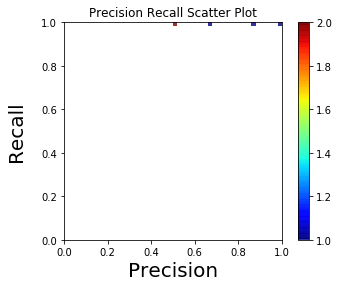

In [48]:
print(results['scores'])
print(results['details'])

# Visualising the Precision-Recall density scatter-plot
nf.plot()